In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [34]:
df = pd.read_csv('/content/gdrive/MyDrive/FIFA선수 이적료 예측/FIFA_train.csv')
df.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [35]:
df.tail()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
8927,16925,S. Adewusi,18,africa,2019,MF,right,1.0,48,63,3.0,60000.0
8928,16936,C. Ehlich,19,europe,2020,DF,right,1.0,47,59,2.0,40000.0
8929,16941,N. Fuentes,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0
8930,16942,J. Milli,18,europe,2021,GK,right,1.0,47,65,1.0,50000.0
8931,16948,N. Christoffersson,19,europe,2020,ST,right,1.0,47,63,2.0,60000.0


In [36]:
#id : 선수 고유의 아이디
#name : 이름
#age : 나이
#continent : 선수들의 국적이 포함되어 있는 대륙입니다
#contract_until : 선수의 계약기간이 언제까지인지 나타내어 줍니다
#position : 선수가 선호하는 포지션입니다. ex) 공격수, 수비수 등
#prefer_foot : 선수가 선호하는 발입니다. ex) 오른발
#reputation : 선수가 유명한 정도입니다. ex) 높은 수치일 수록 유명한 선수
#stat_overall : 선수의 현재 능력치 입니다.
#stat_potential : 선수가 경험 및 노력을 통해 발전할 수 있는 정도입니다.
#stat_skill_moves : 선수의 개인기 능력치 입니다.
#value : FIFA가 선정한 선수의 이적 시장 가격 (단위 : 유로) 입니다

In [37]:
df.info() #데이터 유형 확인 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [38]:
df.isnull().sum() #결측치 확인 

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
value               0
dtype: int64

In [39]:
df.describe() #숫자형 자료 기술통계

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8.932000e+03
mean,7966.775750,25.209136,1.130878,67.091133,71.997201,2.401702,2.778673e+06
std,4844.428521,4.635515,0.423792,6.854910,5.988147,0.776048,5.840982e+06
min,0.000000,16.000000,1.000000,47.000000,48.000000,1.000000,1.000000e+04
25%,3751.750000,21.000000,1.000000,63.000000,68.000000,2.000000,3.750000e+05
50%,7696.500000,25.000000,1.000000,67.000000,72.000000,2.000000,8.250000e+05
75%,12082.250000,28.000000,1.000000,72.000000,76.000000,3.000000,2.600000e+06
max,16948.000000,40.000000,5.000000,94.000000,94.000000,5.000000,1.105000e+08


In [40]:
df.describe(include = 'object') #숫자형 외 자료 기술롱계

,name,continent,contract_until,position,prefer_foot
count,8932,8932,8932,8932,8932
unique,8932,5,17,4,2
top,L. Messi,europe,2019,MF,right
freq,1,5322,2366,3428,6837


*   결측치 없음 
*   contract_until은 범주가 통일되어 있지 않음. 전처리 필요 

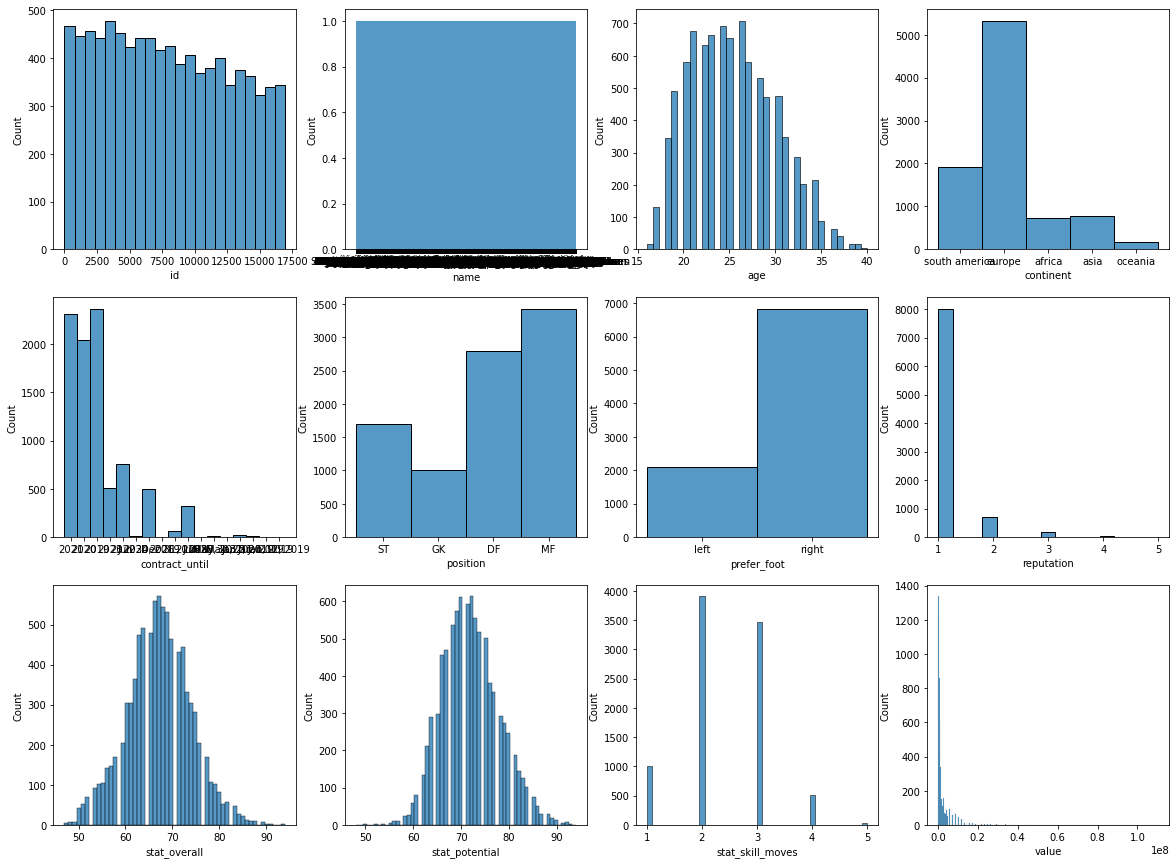

In [41]:
#전체 변수별 분포 시각화 
fig, axes = plt.subplots(3, 4, figsize=(20,15))
axes = axes.flatten()
for col, ax in zip(df.columns, axes):
  sns.histplot(data=df, x=col, ax=ax)
plt.show()

In [42]:
#연속형 자료(float): 'age', 'stat_overall', 'stat_potential', 'value(예측값)'
#범주형/이산형 자료(object, int): 'id', 'name', 'continent','contract_until', 'position', 'prefer_foot', 'reputation', 'stat_skill_moves' 
#정리에서 제외한 변수: id, name 
#contract_until 데이터는 전처리가 필요함.

In [43]:
nums = ['age',	'stat_overall',	'stat_potential']            # 연속형 자료 바인딩
noms = ['continent', 'contract_until', 'position',	'prefer_foot','reputation', 'stat_skill_moves']   # 범주형/이산형 자료 바인딩
y = 'value'

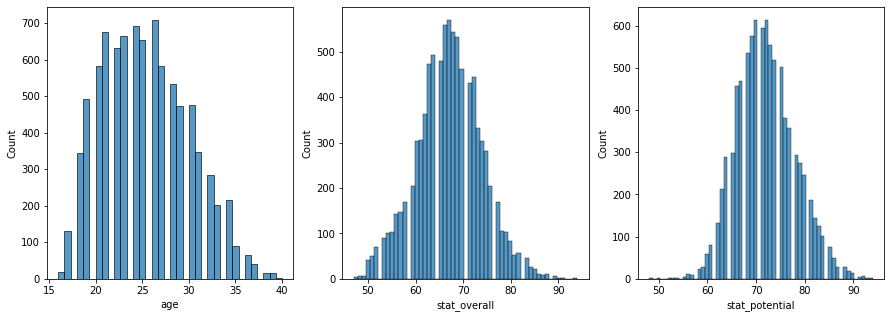

In [44]:
# 연속형 자료 시각화

fig, axes = plt.subplots(1,len(nums), figsize = (15,5))
axes = axes.flatten()

for col, ax in zip(nums, axes) :
  sns.histplot(data = df, x = col, ax = ax)
plt.show()

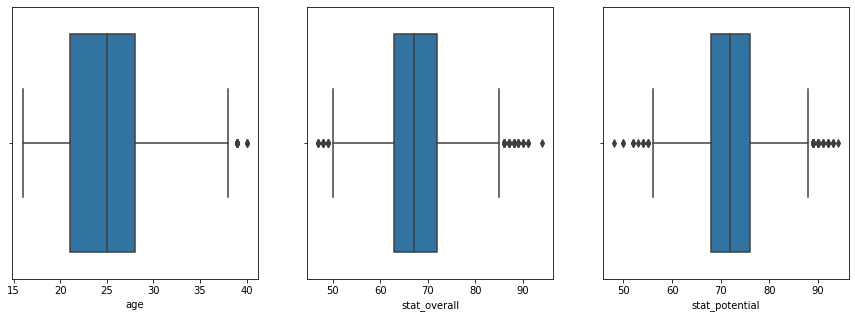

In [45]:
#연속 자료형 기술통계량 시각화 

fig, axes = plt.subplots(1, len(nums), figsize=(15,5))
axes = axes.flatten()

for col, ax in zip(nums,axes):
  sns.boxplot(data = df, x = col, ax = ax)
plt.show()

# 분석


*   축구선수 나이는 평균 25살이며, 최소 16살부터 최대 40살까지 활동한다.
*   축구선수의 능력치는 평균 67 이며, 최소 47부터 94까지 있다. 


*   축구선수 발전가능성 정도는 평균 71이며, 최소 48부터 최대 94까지 있다.






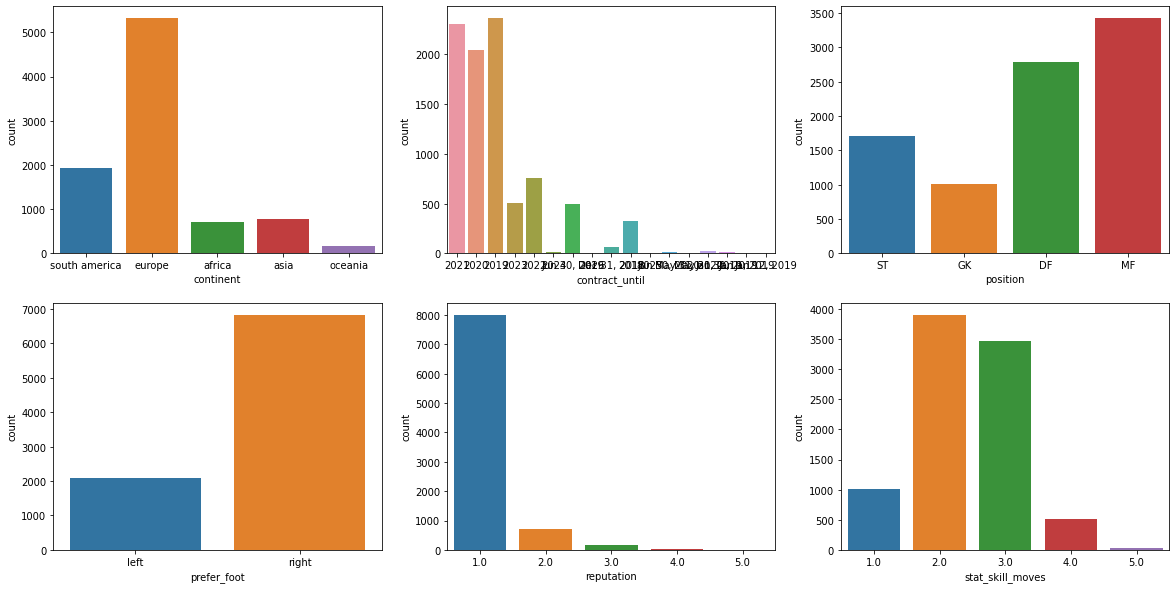

In [46]:
#이산형, 범주형 데이터들 확인

fig, axes = plt.subplots(2,3, figsize = (20,10))
axes = axes.flatten()

for col, ax in zip(noms, axes):
  sns.countplot(data = df[noms], x = col, ax = ax)
plt.show()

# 분석


*   축구선수 국적이 포함된 대륙으로는 유럽이 압도적으로 많고 그 다음으로 남아메리카 대륙이 많다. 

*   축구선수의 계약 만료는 2019,2020,2021년인 경우가 압도적으로 많다.
*   포지션별로는 골키퍼가 가장 적고 그 다음으로 공격수, 수비수, 미드필더 순으로 적다. 미드필더가 가장 많다. 



*   주로쓰는 발이 오른발인 축구선수가 왼발인 축구선수보다 3배이상 많다.
*   유명도는 1점인 축구선수가 대부분이다. 


*   개인기는 2또는 3점인 축구선수가 대부분이다. 



<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

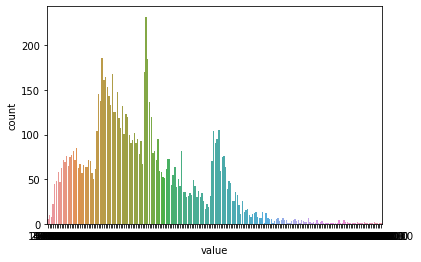

In [47]:
#예측값 시각화 
sns.countplot(data = df, x = y)
plt.plot

In [48]:
df.corr()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
id,1.000000,-0.475785,-0.423739,-0.972374,-0.630199,-0.402455,-0.544280
age,-0.475785,1.000000,0.263468,0.467345,-0.231303,0.039362,0.087319
reputation,-0.423739,0.263468,1.000000,0.521389,0.399183,0.196582,0.665982
stat_overall,-0.972374,0.467345,0.521389,1.000000,0.665453,0.400164,0.658444
stat_potential,-0.630199,-0.231303,0.399183,0.665453,1.000000,0.332578,0.611907
stat_skill_moves,-0.402455,0.039362,0.196582,0.400164,0.332578,1.000000,0.298500
value,-0.544280,0.087319,0.665982,0.658444,0.611907,0.298500,1.000000


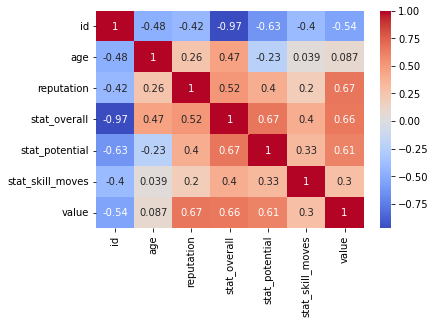

In [49]:
sns.heatmap(data = df.corr(),annot = True, cmap = 'coolwarm')
plt.show()

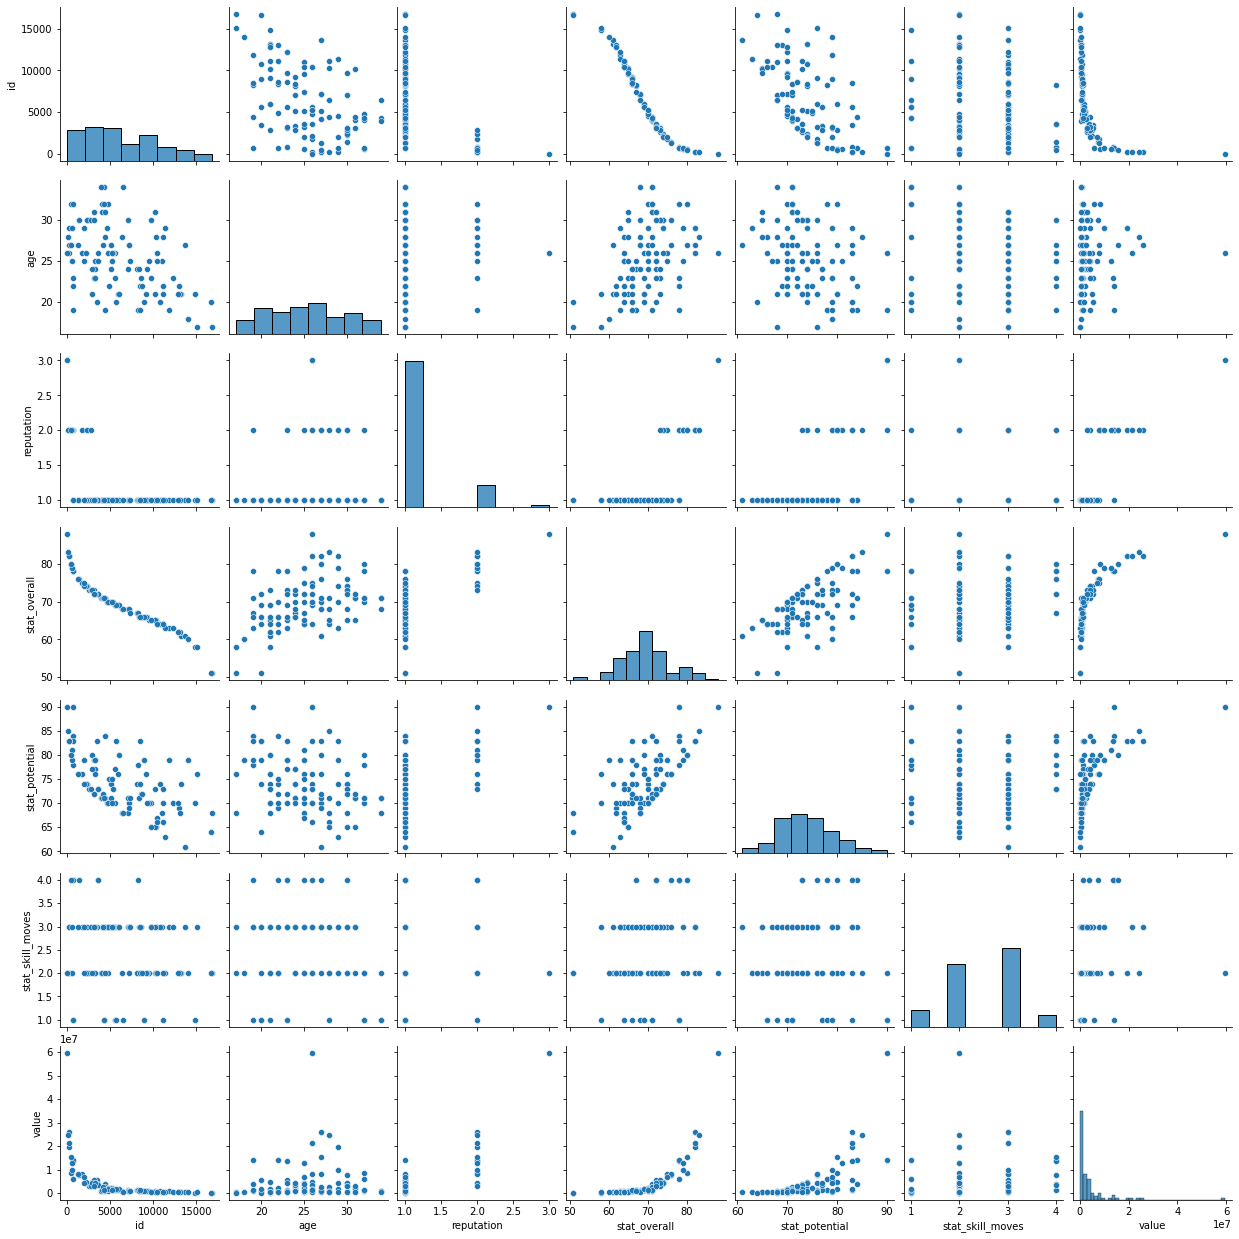

In [50]:
sns.pairplot(df.sample(100))
plt.show()

# 분석



*   value(이적료)와 reputation, stat_overall, stat_potential 순서로 상관계수가 크다.
*   id와 stat_overall 사이에 강한 음의 상관관계가 있는 것으로 보아 선수의 전반적인 능력치가 높을수록 id 번호를 낮게 설정한 것을 알 수 있다.



*   유명도와 선수능력치 발전가능성정도에 따라 이적시장 가격이 높아진다.

*   유명도는 선수능력치와 발전가능성 정도에 따라 높다.
*   능력치는 나이와 발전가능성에 따라 높다.


*   나이가 선수 가치에 비교적 크게 영향을 미치지 않는다. 






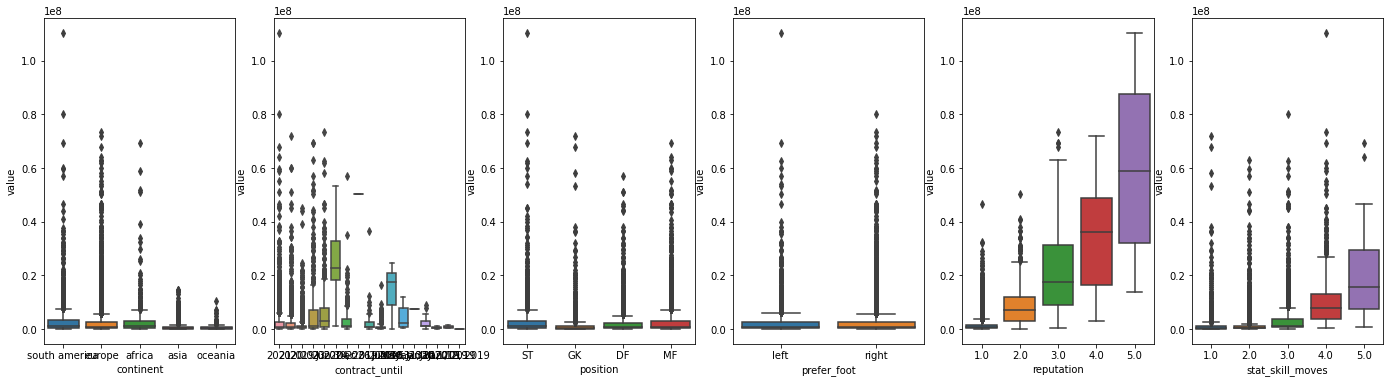

In [51]:
fig, axes = plt.subplots(1, len(noms), figsize=(24,6))
axes = axes.flatten()

for col,ax in zip(noms, axes):
  sns.boxplot(data = df, x = col, y = y, ax = ax)
plt.show()

# 분석



*   축구선수의 시장가치는 모든 범주형 자료형 별로 이상치들이 많이 존재한다. 

